✅ Model loaded successfully.

🔢 Predicted Digit: 2
📊 Confidence: 42.27%


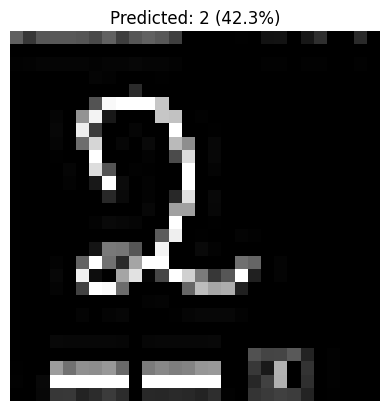

In [15]:
# -------------------- Imports --------------------
import pickle
import math
from PIL import Image, ImageOps, ImageFilter
import matplotlib.pyplot as plt
import numpy as np

# -------------------- Load Trained Model --------------------
with open('mnist_scratch_model.pkl', 'rb') as f:
    model = pickle.load(f)

W1 = model['W1']
b1 = model['b1']
W2 = model['W2']
b2 = model['b2']

print("✅ Model loaded successfully.")

# -------------------- Preprocess Image --------------------
def preprocess_image(path):
    """
    Converts an image to MNIST-style:
    - Grayscale
    - Invert (white digit on black)
    - Binarize & crop tight around digit
    - Resize and pad to 28x28
    - Normalize to [0,1]
    """
    img = Image.open(path).convert('L')              # Grayscale
    img = ImageOps.invert(img)                       # Invert colors
    img = img.point(lambda x: 0 if x < 30 else 255, '1')  # Binarize to remove noise
    img = img.convert('L')                           # Convert back to grayscale

    bbox = img.getbbox()
    img = img.crop(bbox)                             # Crop tight around digit
    img = ImageOps.pad(img, (28, 28), method=Image.Resampling.LANCZOS, color=0)  # Resize + center
    img = img.filter(ImageFilter.SHARPEN)            # Enhance edges

    pixels = list(img.getdata())
    return [p / 255.0 for p in pixels], img          # Normalize + return display image

# -------------------- Activation Functions --------------------
def relu(x): return [max(0, val) for val in x]
def softmax(x):
    max_x = max(x)
    exps = [math.exp(i - max_x) for i in x]
    return [j / sum(exps) for j in exps]

# -------------------- Predict Digit --------------------
def predict(x):
    z1 = [sum(w * xi for w, xi in zip(row, x)) + b for row, b in zip(W1, b1)]
    a1 = relu(z1)
    z2 = [sum(w * ai for w, ai in zip(row, a1)) + b for row, b in zip(W2, b2)]
    out = softmax(z2)
    pred = out.index(max(out))
    confidence = max(out)
    return pred, confidence

# -------------------- Run Prediction --------------------
image_path = 'download.png'  # 🔁 Replace with your image path
img_vector, display_img = preprocess_image(image_path)
label, conf = predict(img_vector)

# -------------------- Output --------------------
print(f"\n🔢 Predicted Digit: {label}")
print(f"📊 Confidence: {conf * 100:.2f}%")

# -------------------- Visualize --------------------
plt.imshow(np.array(display_img), cmap='gray')
plt.title(f"Predicted: {label} ({conf*100:.1f}%)")
plt.axis('off')
plt.show()